In [92]:
#Libraries we will use
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt
from prettytable import PrettyTable




 Data Cleaning and Checking
On this section we will check for undesired values such as NaN and get our dataset prepared so we can train our model later on with proper data. We will also check data types so we can transform them into numerical values if needed.

In [50]:
#We load the .csv and visualize the first ten rows of it, we can also see the columns name
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [51]:
#Now let's check the dataset shape so we can see the number of rows and columns
df.shape

(1599, 12)

As we can see, the name of some columns contains spaces, which is something we do not really want when treating data, this is why we are going to replace these spaces with "_".

In [52]:
#Replace spaces with _ for each column
df.columns = df.columns.str.replace(' ', '_')

In [53]:
#We check there are no missing values and no object data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Fortunately for us, we find there are no null values and all datatypes seem to be right, since there are no object datatypes that must be converted to numerical values.

Data Exploration
After checking our dataset is fine and "ready to go" we are going to explore the data a little bit more, we are going to plot important information that will help us check how features behave and how they are correlated. We will also try to extract as much information as we can from it to help us understand the dataset better.

Knowing our target variable is "quality", we are now going to plot some information about it. Let's see which values this column contains and how many of them there are.

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

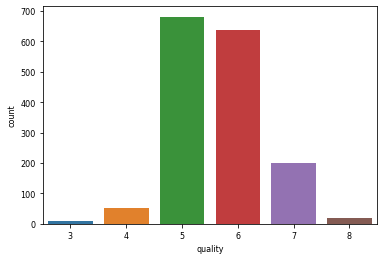

In [54]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(df['quality'])
df['quality'].value_counts()

Now that we got information about our target variable we are going to study the correlation between quality and other features and see which are the ones that play an important role in deciding the quality of a wine.

In [55]:
#Calculate and order correlations
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

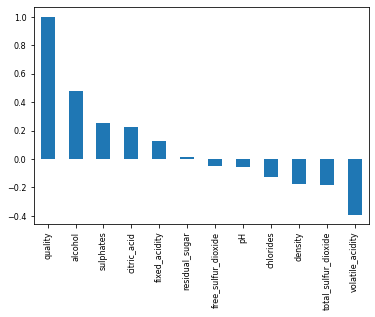

In [56]:
correlations.plot(kind='bar')

Having now the correlation values between quality and the other features, let's have a look at the correlation matrix to have a better understanding of how features correlate with each other.

<AxesSubplot:>

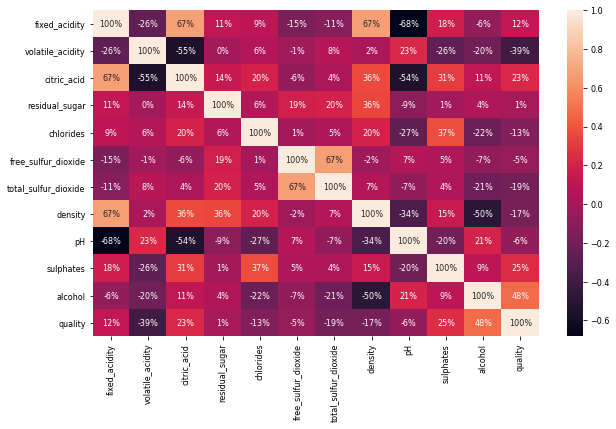

In [57]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From this matrix we can observe, apart from the information we had before, some obvious feature correlations such as pH and acidity. Apart from that, we get to know the percentage of the correlations we obtained before. We can also observe that approximately half of these features correlate positively with quality while the other half correlate negatively.

From all these features, we are going to select the ones with bigger numbers since these are the ones that will give us more information. To do so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [58]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


From all the values, we are selecting alcohol, sulphates, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the different qualities.

In [59]:
Alcohol Percent

SyntaxError: invalid syntax (<ipython-input-59-adfbdb84eb98>, line 1)

In [ ]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse ratings while the ones with higher alcohol % are getting better quality ratings. However, we can observe how "mid quality" wines with rating 5 or 6 are presenting some strange values. Let's do some further investigation now:

In order to see why we do have these different values, we are going to select a subset of the dataset which will only contain rows whose quality column value is 5 or 6, and we will calculate correlation coefficients for this subset.

In [ ]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

In [ ]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the most with quality are the same as we obtained before. However, the difference of values shown on the boxplot can be explained due to having (although the highest) a poor correlation with quality.

Sulphates and Citric Acid Presence

In [ ]:
bp = sns.boxplot(x='quality',y='sulphates', data=df)
bp.set(title="Sulphates in Different Quality Wines")

In [ ]:
bp = sns.boxplot(x='quality',y='citric_acid', data=df)
bp.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive, showing our correlation coefficients calculated before were right: adding higher amounts of sulphates and citric acid to these wines seem to get them higher quality ratings.

Acetic Acid Presence

In [ ]:
bp = sns.boxplot(x='quality',y='volatile_acidity', data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

In the last subsection we plotted some box graphics in order to see which values belong to each quality. For further investigations we are now going to plot histograms for each of those important features so we can see better the correlation between the distribution of values from each feature and quality. To do so, we are first going to separate the quality values in three different groups, so we can do things a little bit easier:
    
    Low: contains wines whose quality is 3 or 4.
Medium: contains wines whose quality is 5 or 6.
High: contains wines whose quality is 7 or 8.

In [ ]:
#We make a copy of our dataframe and group quality in differnt groups
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

C:\Users\hp-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

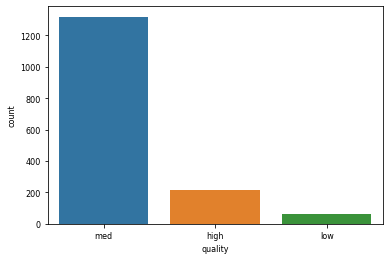

In [61]:
sns.countplot(df_aux['quality'])

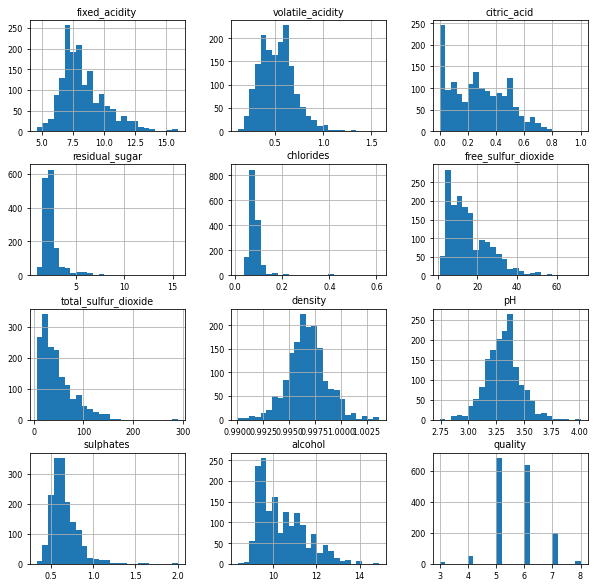

In [62]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

###### Feature Selection
Now that we have already studied our dataset through histograms and different graphics it's time to select some features we will use in our machine learning algorithms. In this specific case, what we are going to do is use the same columns we studied before, since those are the four ones that give us the most information between features and quality.

In [63]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

# Regression Models

On this section, after having understood our data and dropped some useless features, we are going to make an estimation of quality based on the other features. To do so we are going to use Linear Regression, Decision Tree Rregressor and Random Forest Regressor. We will also plot the values of prediction and true quality and the confussion marices, so we can see how many of the predicted values are right (the diagonal of the matrix).

In [64]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Linear Regression

In [66]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

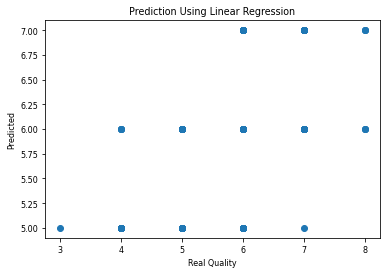

In [67]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

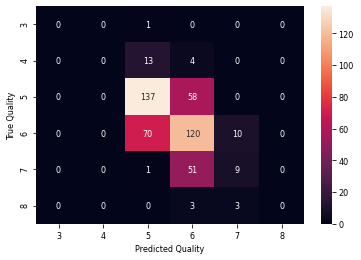

In [68]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

Decision Tree Regressor

In [70]:
#Fit the model and make prediction
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

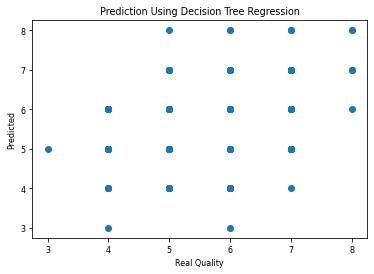

In [71]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

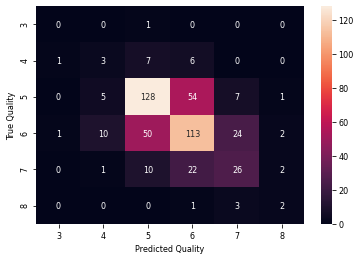

In [72]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

Random Forest Regressor

In [73]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

In [ ]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

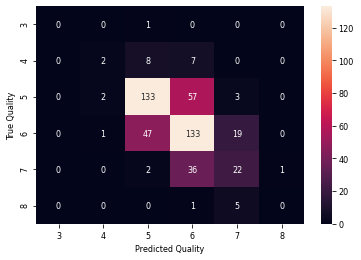

In [74]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# RMSE of Models

After having prepared our models, it's now time to evaluate them. To do so we are going to use RMSE (Root Mean Square Error) which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are so RMSE is a measure of how spread out these residuals are.

# Linear Regression RMSE

In [75]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.7085783889827104


# Decision Tree Regressor RMSE

In [76]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.8453303101943839


# Random Forest Regression RMSE

In [78]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.699702317656111


When deciding which regression algorithm is better by looking at RMSE we would better choose the one with smaller value, so for this problem, Random Forest Regression seems to be the best fitting algorithm.

# Improving the results with 1-Off Accuray

As we can see from the confusion matrices we show above our predictions aren't bad at all but in order to "improve" them we are going to apply a concept called 1-off accuracy, which states that if the distance between our predicted quality and the true quality is 1 (in absolut value), we will accept it as a correct prediction.

We will now create a function that will transform our predicted value into the true value if the distance between them is equal to 1. Afterwards we are going to plot the new correlation matrices and test the new values with some metrics.

In [80]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

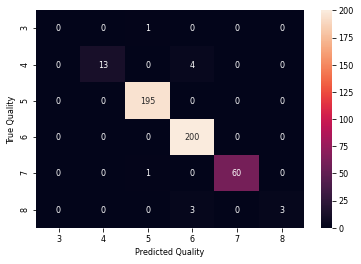

In [81]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

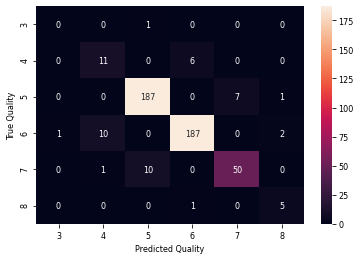

In [82]:
#Confussion Matrix for the Decission Tree Regression Model
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

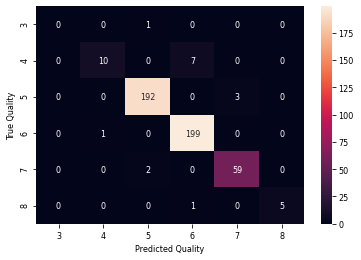

In [83]:
#Confussion Matrix for the Random Forest Regression Model
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

As we can see, our results are far better than the ones we obtained before. Therefore we are now going to calculate the new RMSE for all the three models.

In [84]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.27386127875258304

RMSE for new improved Decision Tree Regression is: 0.60380736442456

RMSE for new improved Random Forest Regression is: 0.3535533905932738



# Testing Our Models with Precision, Recall and F1 Score

For further testing, we are plotting a table that shows the precision, recall and f1score of our three regressor models.

In [93]:
warnings.filterwarnings('ignore')
ptbl = PrettyTable()
ptbl.field_names = ["Regressor Model", "Precision", "Recall", "F1Score"]
ptbl.add_row(["Linear", precision_score(y_test, y_prediction_lr, average = 'weighted'),
           recall_score(y_test, y_prediction_lr, average = 'weighted'), f1_score(y_test, y_prediction_lr, average = 'weighted')])
ptbl.add_row(["Decision Tree", precision_score(y_test, y_prediction_dt, average = 'weighted'), recall_score(y_test, y_prediction_dt, average = 'weighted'), 
           f1_score(y_test, y_prediction_dt, average = 'weighted')])
ptbl.add_row(["Random Forest", precision_score(y_test, y_prediction_rf, average = 'weighted'), recall_score(y_test, y_prediction_rf, average = 'weighted'),
           f1_score(y_test, y_prediction_rf, average = 'weighted')])
print(ptbl)

+-----------------+--------------------+--------------------+--------------------+
| Regressor Model |     Precision      |       Recall       |      F1Score       |
+-----------------+--------------------+--------------------+--------------------+
|      Linear     | 0.9797021240507777 |      0.98125       | 0.9787385410477942 |
|  Decision Tree  | 0.9223102994815217 | 0.9166666666666666 | 0.9187304332285525 |
|  Random Forest  | 0.9661947165672622 |      0.96875       | 0.9660315070376045 |
+-----------------+--------------------+--------------------+--------------------+


# Conclusions

After having obtained all the results through our models and plots, these are some things we can say about this problem and solution:

The vast majority of wines get a quality rating of five or six, while having good and bad wines seems more unlikely. There seem not to be any excellent wines (>8) on this database.

From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using regression algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.

Applying the concept 1-off Accuracy gives us much better results.

Random Forest and Linear Regression seem to be the best fitting models when solving this problem using regression.

Since there are only six different quality values in this dataset, it would be clever treating this problem as a multiclass classification problem (we can use the quality grouping approach we took earlier) and we might even get better results.